# Heart Disease Dataset
   by Renato Dunaevits and Shani Bronshtein

# Import Liberies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions import *
from pipeline import *

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# The Data

In [2]:
heartdf=pd.read_csv('heart_2020_cleaned.csv')

source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Features

Key: 

Target --> HeartDisease (yes/no) - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

* BMI - Body Mass Index 
* Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke - Ever told) you had a stroke?
* PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
* MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
* DiffWalking - Do you have serious difficulty walking or climbing stairs?
* Sex - male/female
* AgeCategory - Fourteen-level age category
* Race - Imputed race/ethnicity value
* Diabetic - Ever told you had diabetes?
* PhysicalActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* GenHealth - Would you say that in general your health is...
* SleepTime - On average, how many hours of sleep do you get in a 24-hour period?
* Asthma - Ever told you had asthma?
* KidneyDisease - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer - Ever told you had skin cancer?

# EDA

In [3]:
heartdf.shape

(319795, 18)

In [4]:
heartdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Most of features are object. So probably we will have to do a label encoder at the end.

In [6]:
heartdf.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
heartdf.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

It doesn't have any Null value

In [8]:
heartdf.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

Most of the feature haהק less then 6 unique values. Just one feature with a lot of unique values

In [9]:
heartdf.duplicated().sum()

18078

The dataset has a lot of duplicate rows. It means that this duplicate rows won't add anything for the model so It will be better to drop them.

We don't want to destroy the dataset source so we will make a copy.

In [3]:
heartdf2=heartdf.drop_duplicates()

In [11]:
heartdf2.shape

(301717, 18)

We can see that we just drop all the duplicate rows.

In [12]:
#targe vs.non-targe

heartdf2.groupby(['HeartDisease']).size()

HeartDisease
No     274456
Yes     27261
dtype: int64

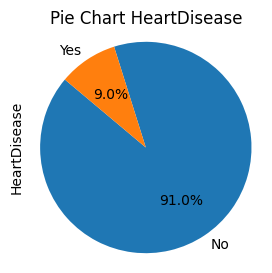

In [13]:
create_pie_chart(heartdf2,'HeartDisease')

Our target it's not balanced between the two options so we must use some of the imbalance  methods during the model.

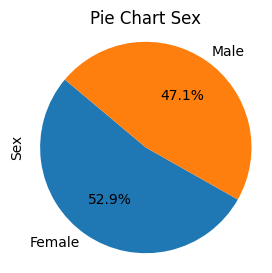

In [14]:
create_pie_chart(heartdf2,'Sex')

The Sex feature is good balanced.

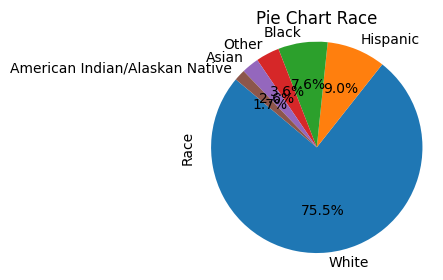

In [15]:
create_pie_chart(heartdf2,'Race')

Most of the people in the dataset are white. And a small part with the other races.

In [16]:
heartdf2.groupby(['Race']).size().sort_values()

Race
American Indian/Alaskan Native      5192
Asian                               7993
Other                              10891
Black                              22810
Hispanic                           27107
White                             227724
dtype: int64

In [17]:
heartdf2.groupby(['Smoking']).size().sort_values()

Smoking
Yes    127405
No     174312
dtype: int64

Most of the people doesn't smoke but it's a bit of surprise that almost 45% of the data are smoker.

In [32]:
#List of age group
order_age=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']

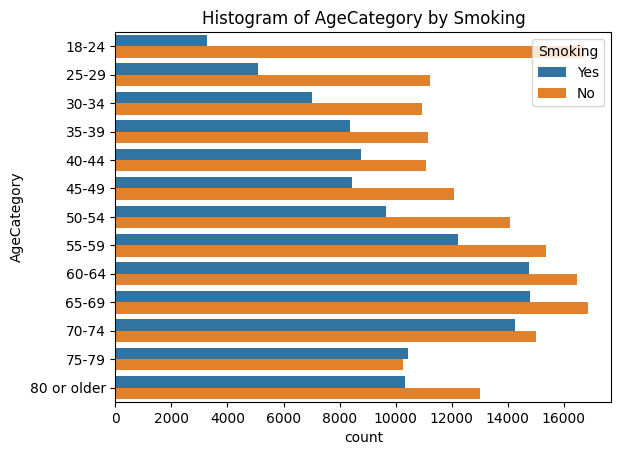

In [19]:
sns.countplot(data=heartdf2,y='AgeCategory',hue='Smoking',order=order_age)

plt.title('Histogram of AgeCategory by Smoking')
plt.show()

In [20]:
heartdf2.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

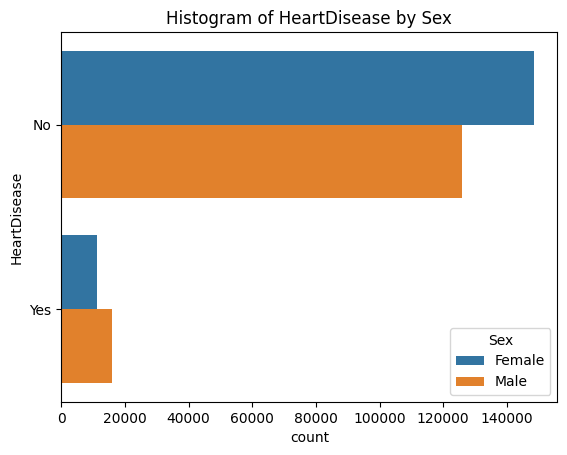

In [21]:
sns.countplot(data=heartdf2,y='HeartDisease',hue='Sex')

plt.title('Histogram of HeartDisease by Sex')
plt.show()

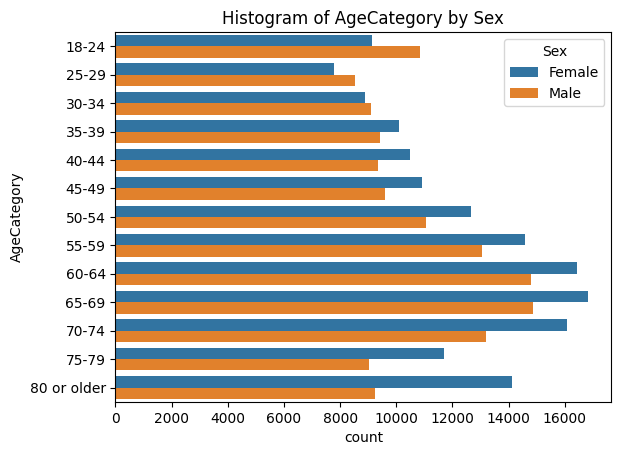

In [22]:
sns.countplot(data=heartdf2,y='AgeCategory',hue='Sex',order=order_age)

plt.title('Histogram of AgeCategory by Sex')
plt.show()

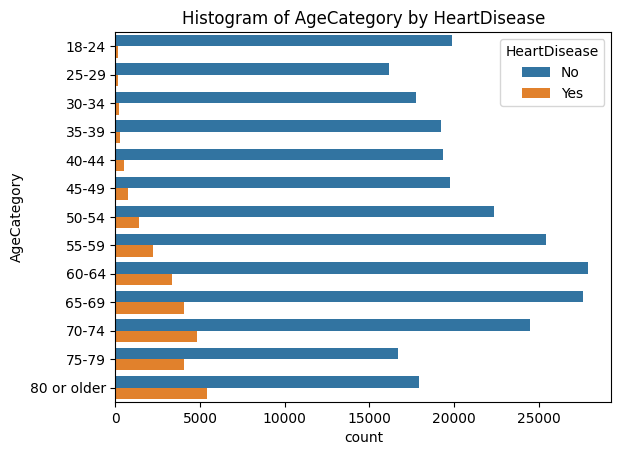

In [23]:
sns.countplot(data=heartdf2,y='AgeCategory',hue='HeartDisease',order=order_age)

plt.title('Histogram of AgeCategory by HeartDisease')
plt.show()

In [24]:
heartdf2['AlcoholDrinking'].value_counts(normalize=True)

No     0.928473
Yes    0.071527
Name: AlcoholDrinking, dtype: float64

In [25]:
heartdf2.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [26]:
heartdf2['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [27]:
heartdf2.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

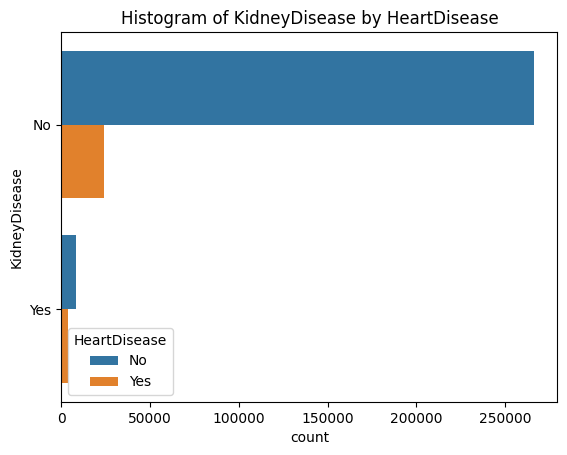

In [28]:
sns.countplot(data=heartdf2,y='KidneyDisease',hue='HeartDisease')

plt.title('Histogram of KidneyDisease by HeartDisease')
plt.show()

In [29]:
heartdf2.groupby(['SkinCancer','HeartDisease'])['HeartDisease'].count()

SkinCancer  HeartDisease
No          No              250132
            Yes              22293
Yes         No               24324
            Yes               4968
Name: HeartDisease, dtype: int64

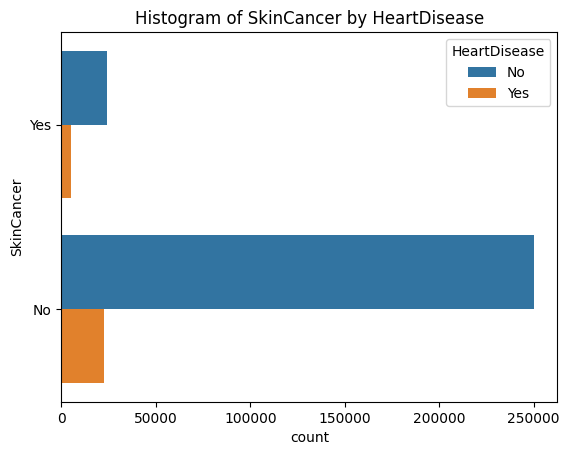

In [30]:
sns.countplot(data=heartdf2,y='SkinCancer',hue='HeartDisease')

plt.title('Histogram of SkinCancer by HeartDisease')
plt.show()

In [31]:
heartdf2.groupby(['SkinCancer','Race'])['Race'].count()

SkinCancer  Race                          
No          American Indian/Alaskan Native      5022
            Asian                               7937
            Black                              22672
            Hispanic                           26693
            Other                              10411
            White                             199690
Yes         American Indian/Alaskan Native       170
            Asian                                 56
            Black                                138
            Hispanic                             414
            Other                                480
            White                              28034
Name: Race, dtype: int64

In [32]:
heartdf2.groupby(['Asthma','HeartDisease'])['HeartDisease'].count()

Asthma  HeartDisease
No      No              236737
        Yes              22329
Yes     No               37719
        Yes               4932
Name: HeartDisease, dtype: int64

In [33]:
heartdf2.groupby(['Diabetic','HeartDisease'])['HeartDisease'].count()

Diabetic                 HeartDisease
No                       No              234380
                         Yes              17416
No, borderline diabetes  No                5987
                         Yes                789
Yes                      No               31641
                         Yes               8948
Yes (during pregnancy)   No                2448
                         Yes                108
Name: HeartDisease, dtype: int64

In [34]:
heartdf2.Diabetic.value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [35]:
heartdf2.GenHealth.value_counts()

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [36]:
heartdf2[heartdf2.Diabetic=='Yes (during pregnancy)'].groupby('Sex').size()

Sex
Female    2556
dtype: int64

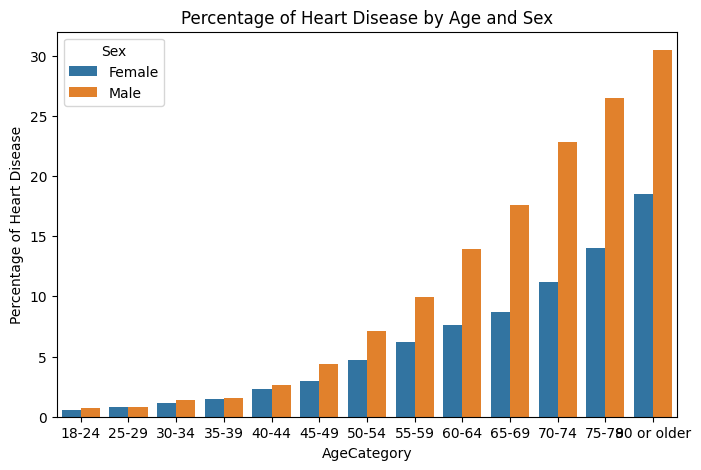

In [37]:
heartdf5 = heartdf2.replace({'Yes': 1, 'No': 0})
heartdf5['HeartDiseasePercentage'] = heartdf5.groupby(['AgeCategory', 'Sex'])['HeartDisease'].transform(lambda x: x.mean() * 100)

plt.figure(figsize=(8, 5))

sns.barplot(data=heartdf5, x='AgeCategory', y='HeartDiseasePercentage', hue='Sex', order=order_age)
plt.ylabel('Percentage of Heart Disease')
plt.title('Percentage of Heart Disease by Age and Sex')

plt.show()

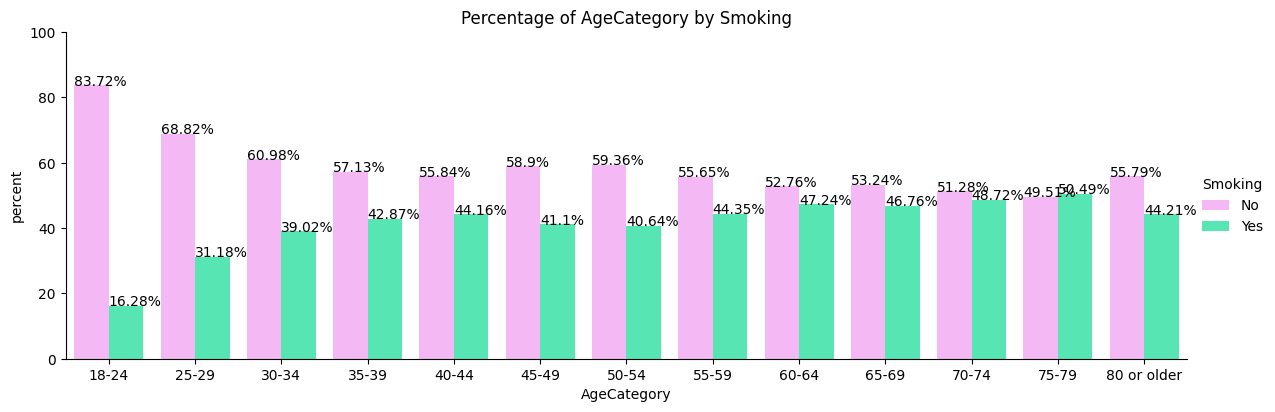

In [33]:
normalize_plot(heartdf2,'AgeCategory','Smoking',order_age,4,3)

In [34]:
order_GenHealth = ['Poor','Fair','Good','Very good','Excellent']

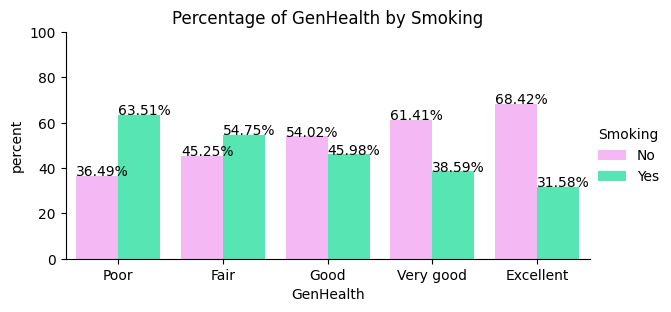

In [30]:
normalize_plot(heartdf2,'GenHealth','Smoking',order_GenHealth,3,2)

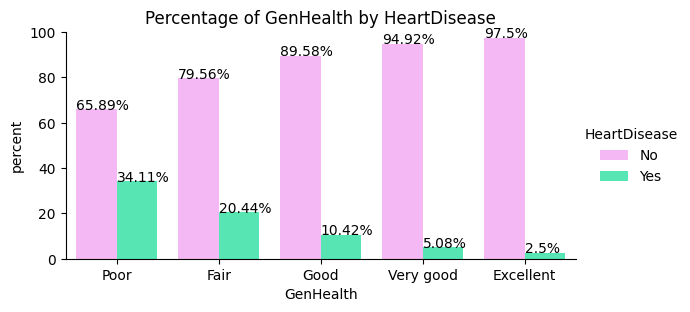

In [35]:
normalize_plot(heartdf2,'GenHealth','HeartDisease',order_GenHealth,3,2)

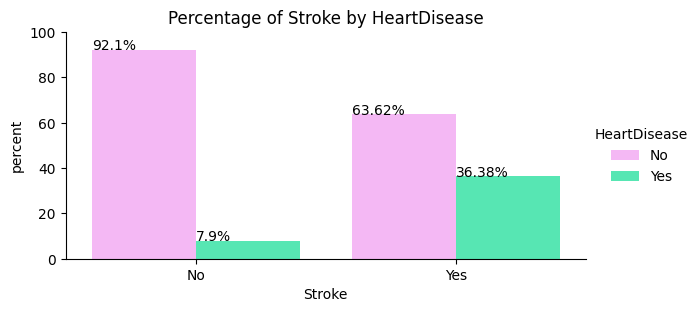

In [36]:
normalize_plot(heartdf2,'Stroke','HeartDisease',None,3,2)

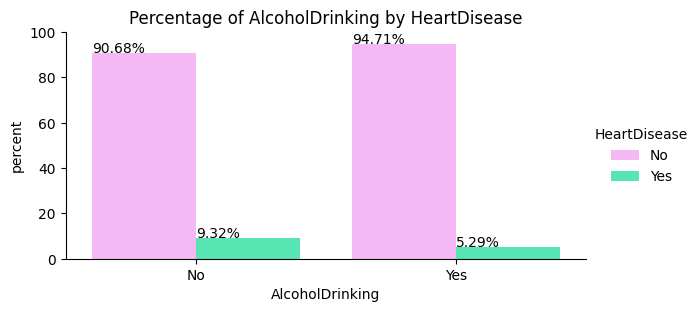

In [37]:
normalize_plot(heartdf2,'AlcoholDrinking','HeartDisease',None,3,2)

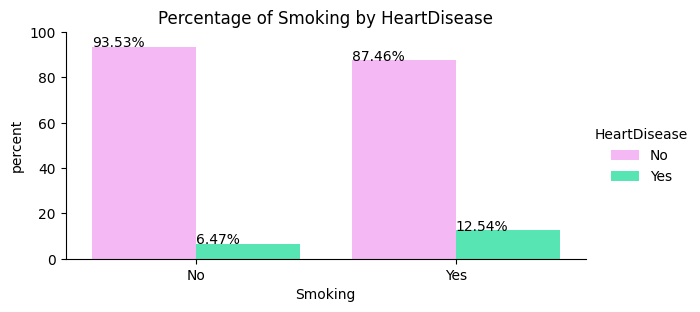

In [38]:
normalize_plot(heartdf2,'Smoking','HeartDisease',None,3,2)

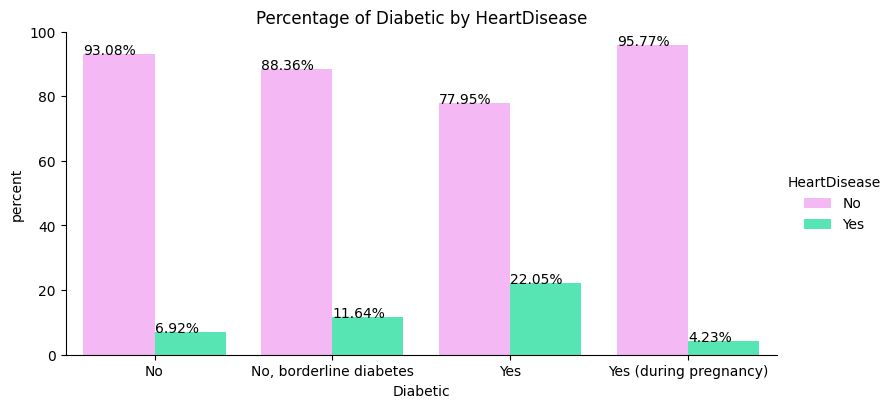

In [28]:
normalize_plot(heartdf2,'Diabetic','HeartDisease',None,4,2)

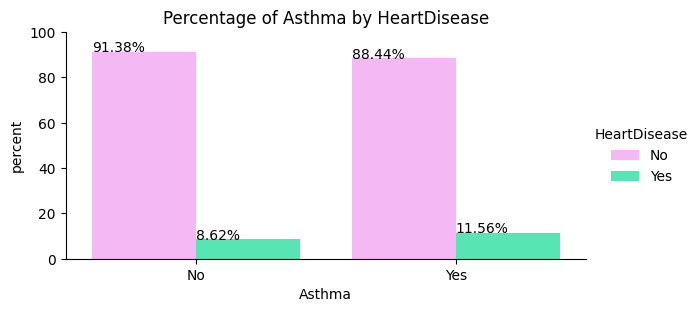

In [26]:
normalize_plot(heartdf2,'Asthma','HeartDisease',None,3,2)

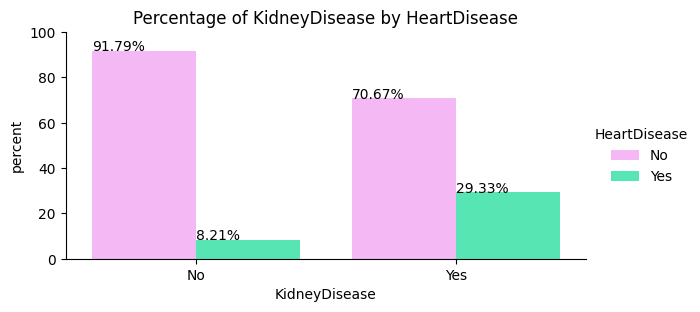

In [39]:
normalize_plot(heartdf2,'KidneyDisease','HeartDisease',None,3,2)

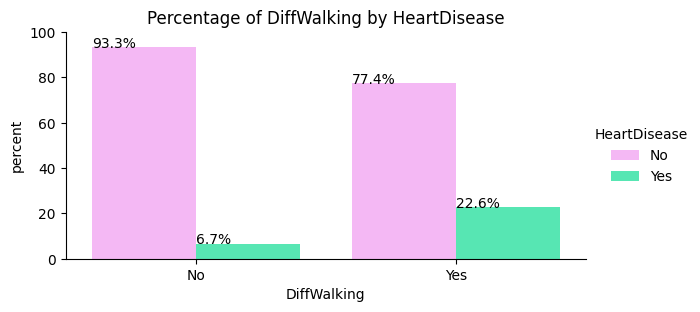

In [40]:
normalize_plot(heartdf2,'DiffWalking','HeartDisease',None,3,2)

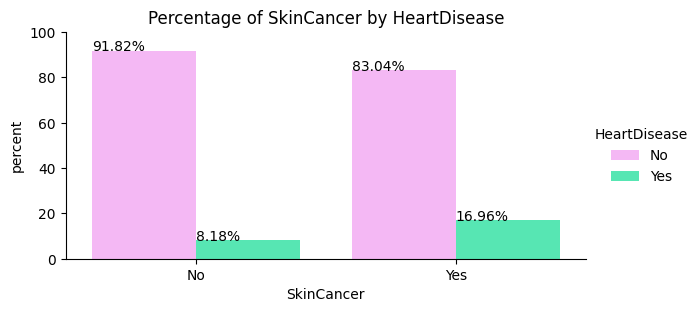

In [41]:
normalize_plot(heartdf2,'SkinCancer','HeartDisease',None,3,2)

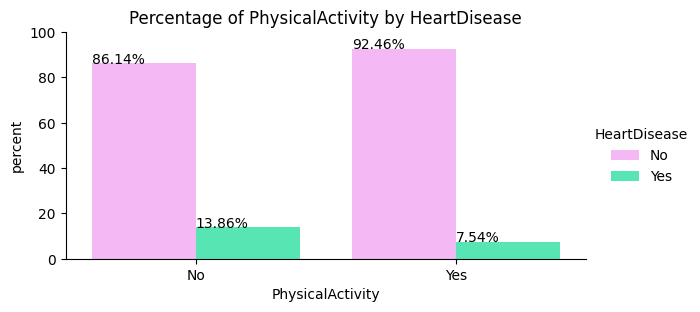

In [42]:
normalize_plot(heartdf2,'PhysicalActivity','HeartDisease',None,3,2)

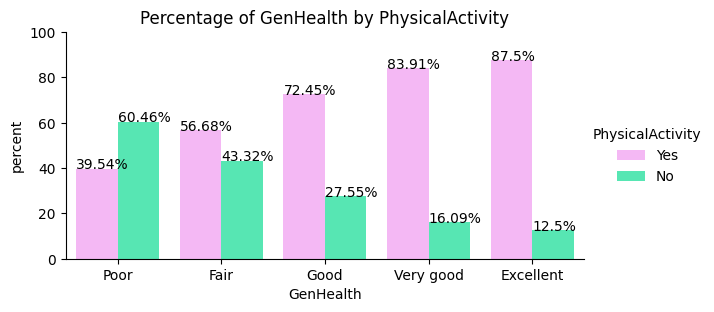

In [43]:
normalize_plot(heartdf2,'GenHealth','PhysicalActivity',order_GenHealth,3,2)

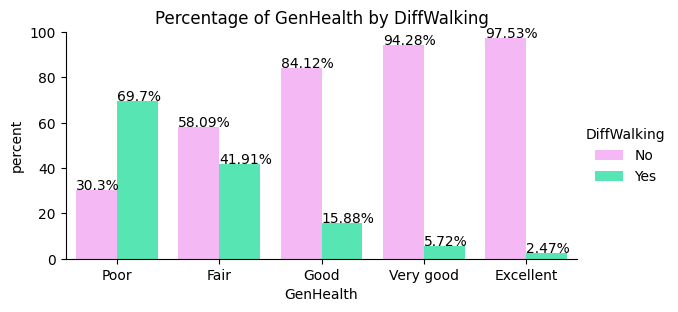

In [44]:
normalize_plot(heartdf2,'GenHealth','DiffWalking',order_GenHealth,3,2)

<Axes: xlabel='SleepTime'>

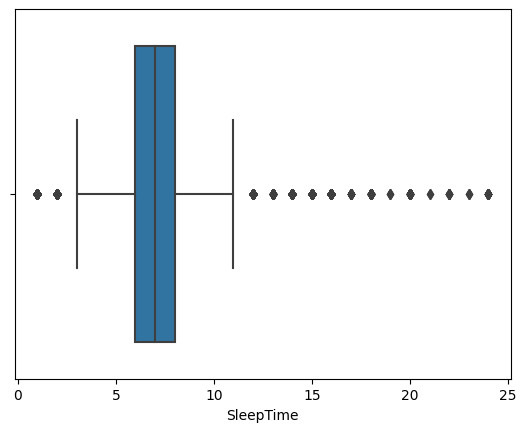

In [53]:
sns.boxplot(x='SleepTime', data=heartdf2)

In [4]:
heartdf3 = heartdf2[(heartdf2.SleepTime>3)&(heartdf2.SleepTime<15)]
heartdf3.shape

(297727, 18)

In [55]:
heartdf3['HeartDisease'].value_counts(normalize=True)

No     0.910593
Yes    0.089407
Name: HeartDisease, dtype: float64

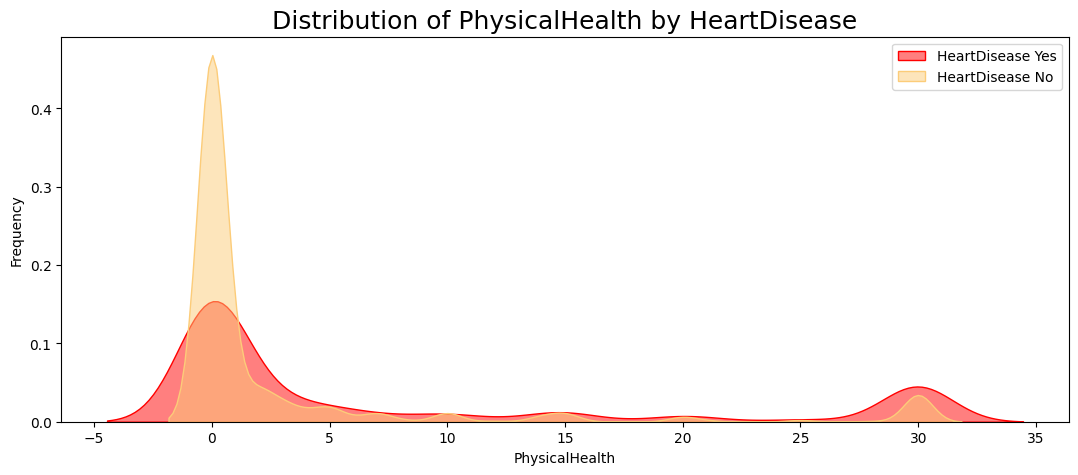

In [56]:
graph_distrib(heartdf3,'PhysicalHealth','HeartDisease')

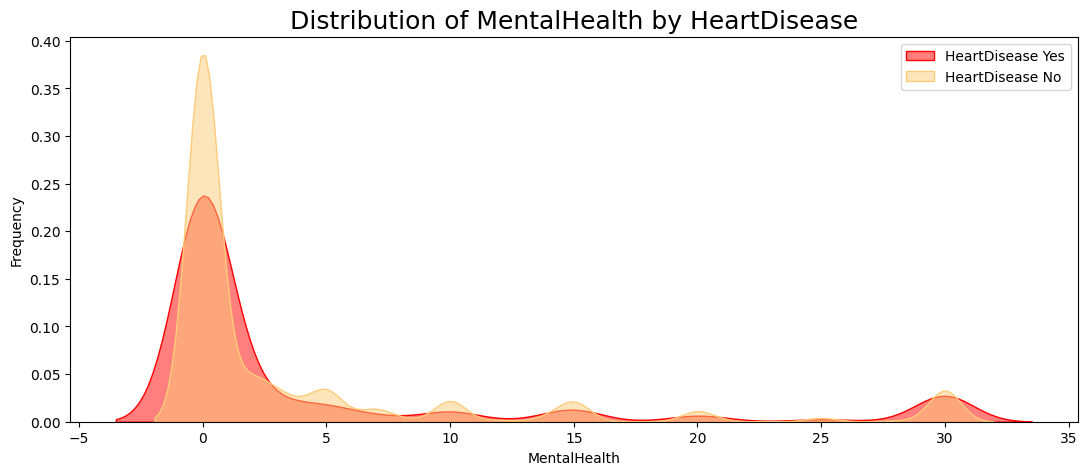

In [57]:
graph_distrib(heartdf3,'MentalHealth','HeartDisease')

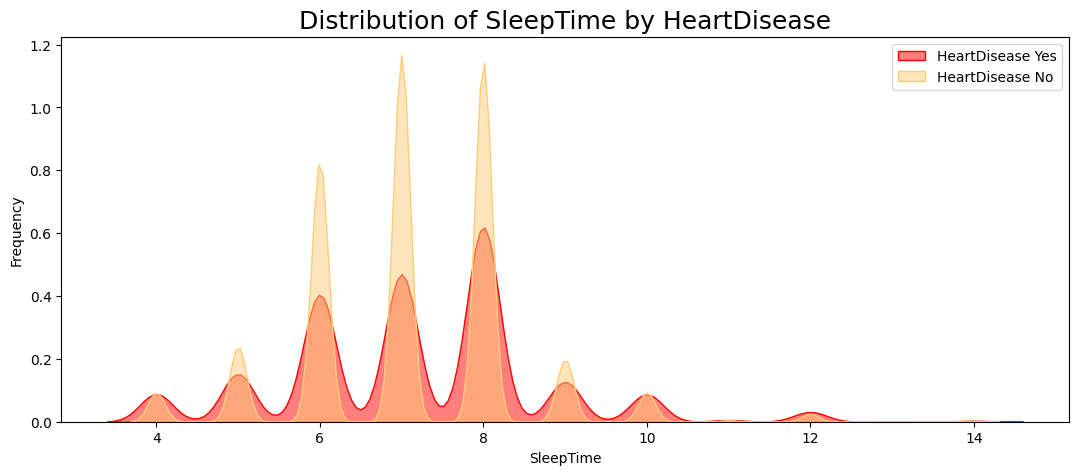

In [75]:
graph_distrib(heartdf3,'SleepTime','HeartDisease')

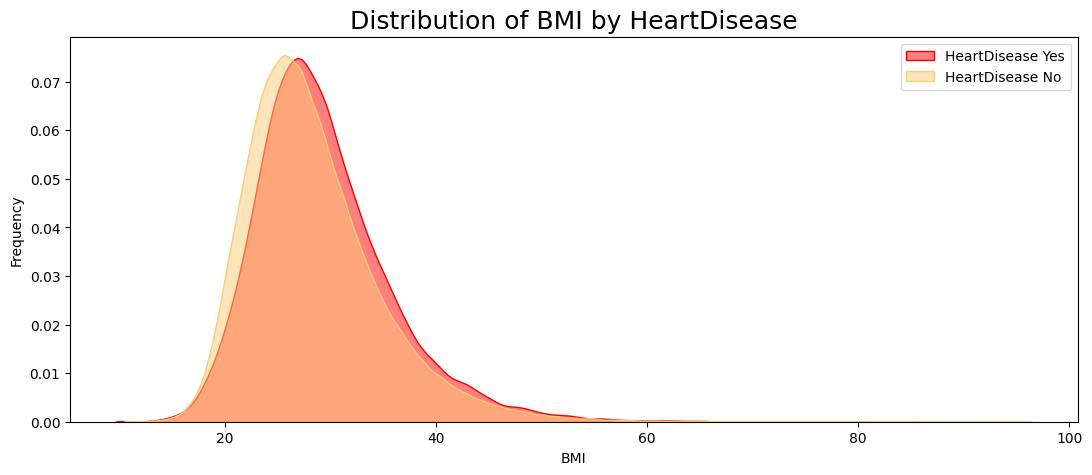

In [15]:
graph_distrib(heartdf3,'BMI','HeartDisease')

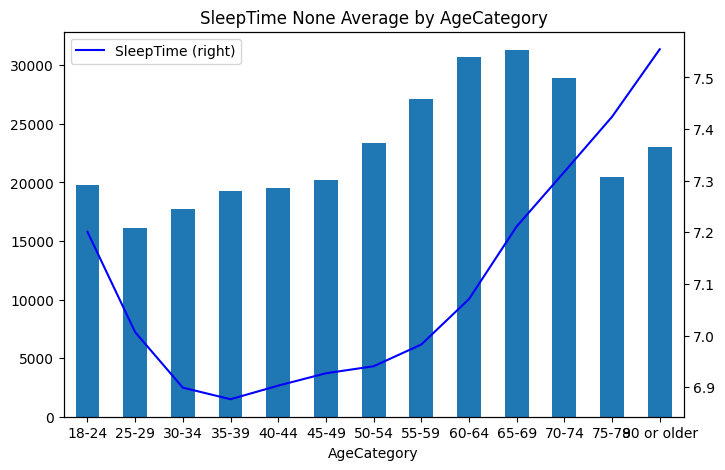

In [58]:
graph_with_lines(heartdf3,'AgeCategory','SleepTime')

plt.xticks(ticks=range(len(order_age)), labels=order_age)
plt.show()

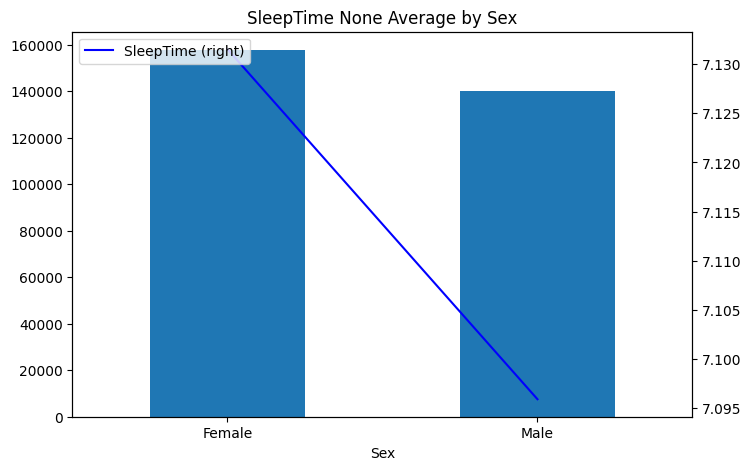

In [59]:
graph_with_lines(heartdf3,'Sex','SleepTime')

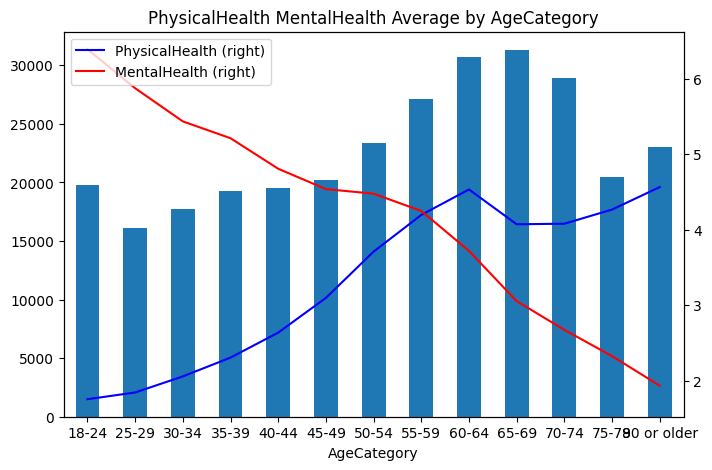

In [61]:
graph_with_lines(heartdf3,'AgeCategory','PhysicalHealth','MentalHealth')

plt.xticks(ticks=range(len(order_age)), labels=order_age)

plt.show()


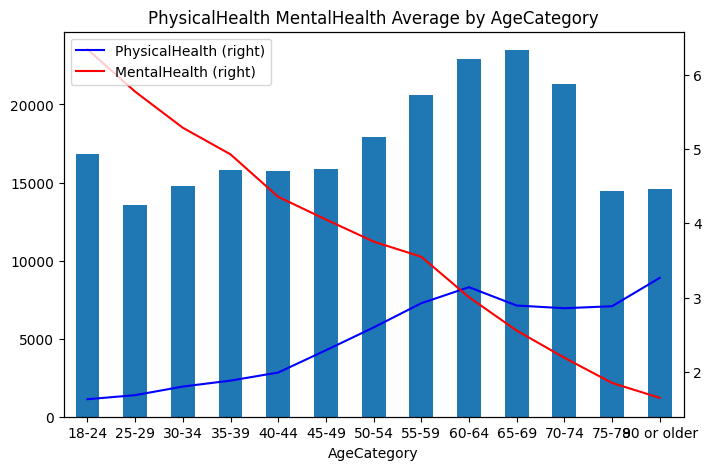

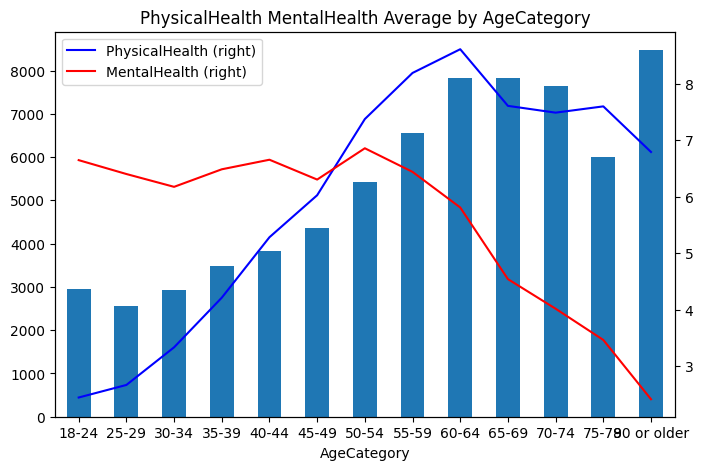

In [62]:
graph_with_lines(heartdf3[heartdf3.PhysicalActivity =="Yes"],'AgeCategory','PhysicalHealth','MentalHealth')
graph_with_lines(heartdf3[heartdf3.PhysicalActivity =="No"],'AgeCategory','PhysicalHealth','MentalHealth')
plt.xticks(ticks=range(len(order_age)), labels=order_age)

plt.show()

In [64]:
#
heartdf3.groupby(['PhysicalHealth']).size()

PhysicalHealth
0.0     206747
1.0      10357
2.0      14729
3.0       8496
4.0       4406
5.0       7499
6.0       1256
7.0       4542
8.0        899
9.0        177
10.0      5356
11.0        83
12.0       586
13.0        88
14.0      2825
15.0      4876
16.0       131
17.0       108
18.0       160
19.0        34
20.0      3100
21.0       612
22.0        87
23.0        45
24.0        62
25.0      1110
26.0        63
27.0       118
28.0       415
29.0       188
30.0     18572
dtype: int64

In [65]:
heartdf3.groupby(['MentalHealth']).size()

MentalHealth
0.0     186059
1.0       9166
2.0      16178
3.0      10311
4.0       5315
5.0      13876
6.0       1485
7.0       5459
8.0       1074
9.0        200
10.0     10318
11.0        80
12.0       745
13.0       107
14.0      2013
15.0      9662
16.0       148
17.0       123
18.0       208
19.0        20
20.0      5297
21.0       339
22.0        98
23.0        65
24.0        65
25.0      1903
26.0        57
27.0       120
28.0       488
29.0       303
30.0     16445
dtype: int64

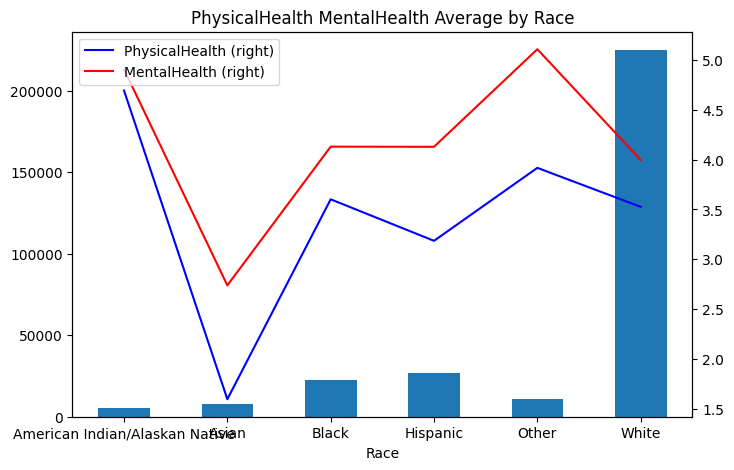

In [66]:
graph_with_lines(heartdf3,'Race','PhysicalHealth','MentalHealth')

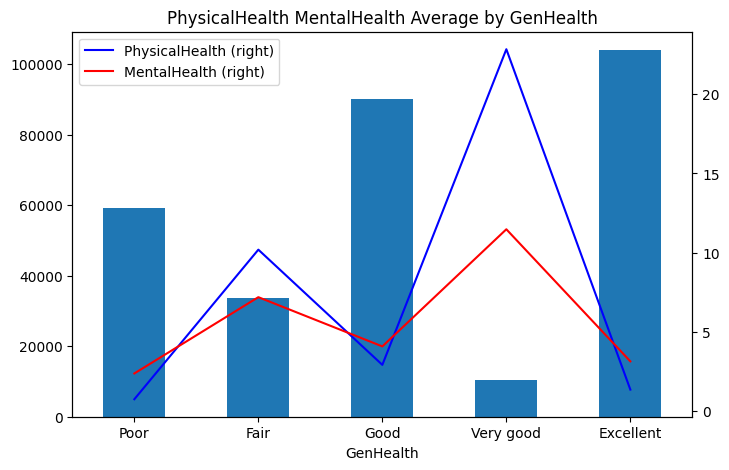

In [67]:
graph_with_lines(heartdf3,'GenHealth','PhysicalHealth','MentalHealth')
plt.xticks(ticks=range(len(order_GenHealth)), labels=order_GenHealth)

plt.show()

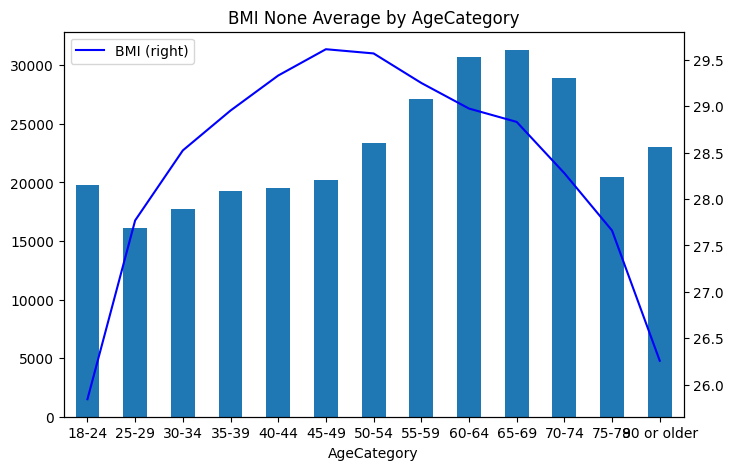

In [68]:
graph_with_lines(heartdf3,'AgeCategory','BMI')

plt.xticks(ticks=range(len(order_age)), labels=order_age)
plt.show()

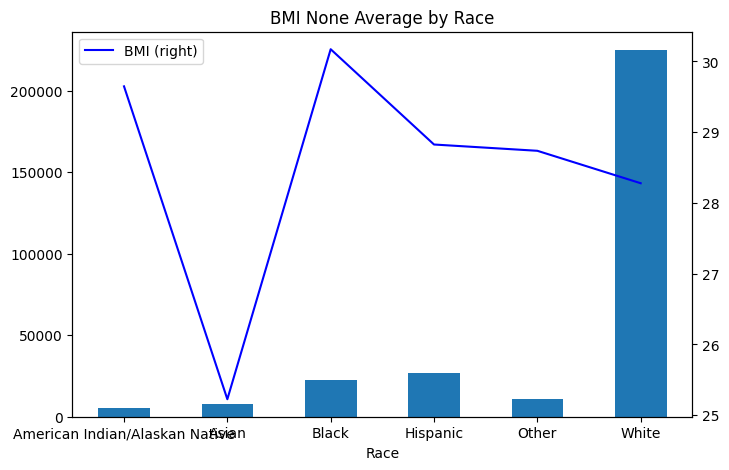

In [69]:
graph_with_lines(heartdf3,'Race','BMI')

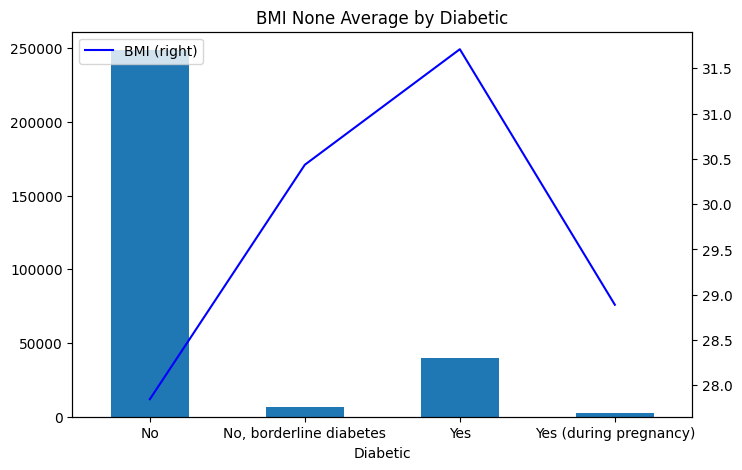

In [70]:
graph_with_lines(heartdf3,'Diabetic','BMI')

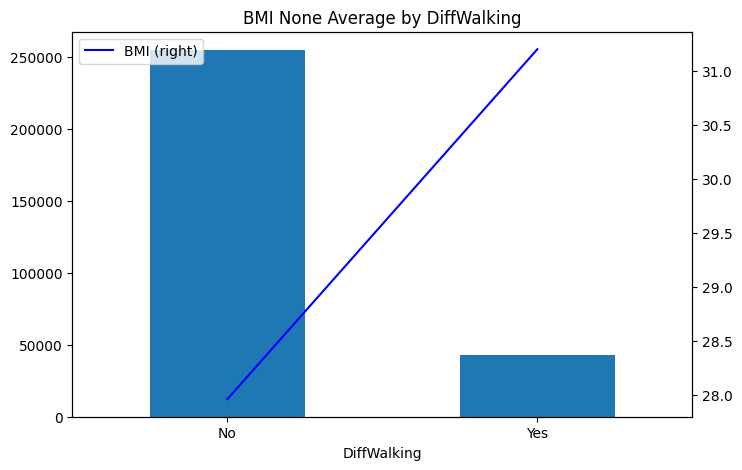

In [71]:
graph_with_lines(heartdf3,'DiffWalking','BMI')

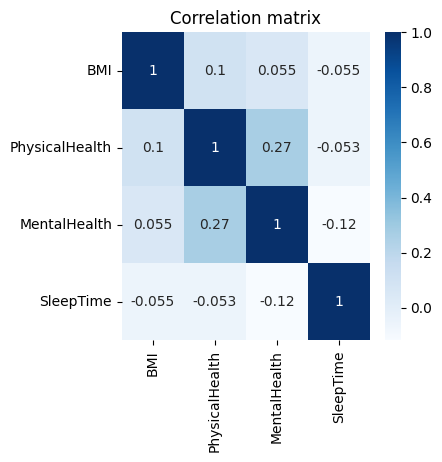

In [72]:
#corraltion matrix

plt.figure(figsize=(4,4))
sns.heatmap(heartdf3.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Correlation matrix')
plt.show()

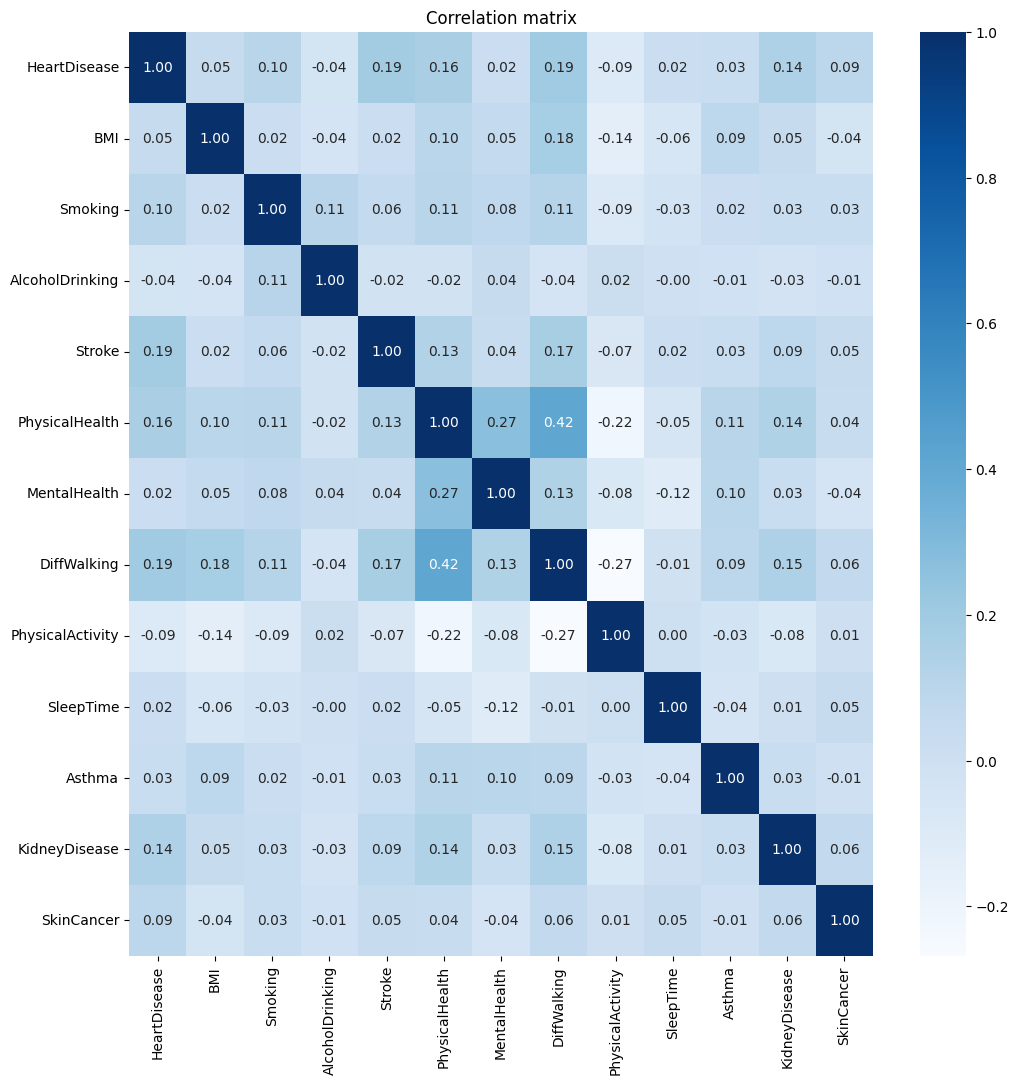

In [73]:
plt.figure(figsize=(12,12))
sns.heatmap(heartdf3.replace({'Yes':1,'No':0}).corr(),cbar=True,annot=True,cmap='Blues',fmt=".2f")
plt.title('Correlation matrix')
plt.show()


In [74]:
heartdf3['HeartDisease'].value_counts(normalize=True)

No     0.910593
Yes    0.089407
Name: HeartDisease, dtype: float64